# SLOPE Indicator Example

In [6]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume

from mplchart.indicators import TSF, SLOPE

In [7]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 00:00:00-05:00 to 2024-12-31 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


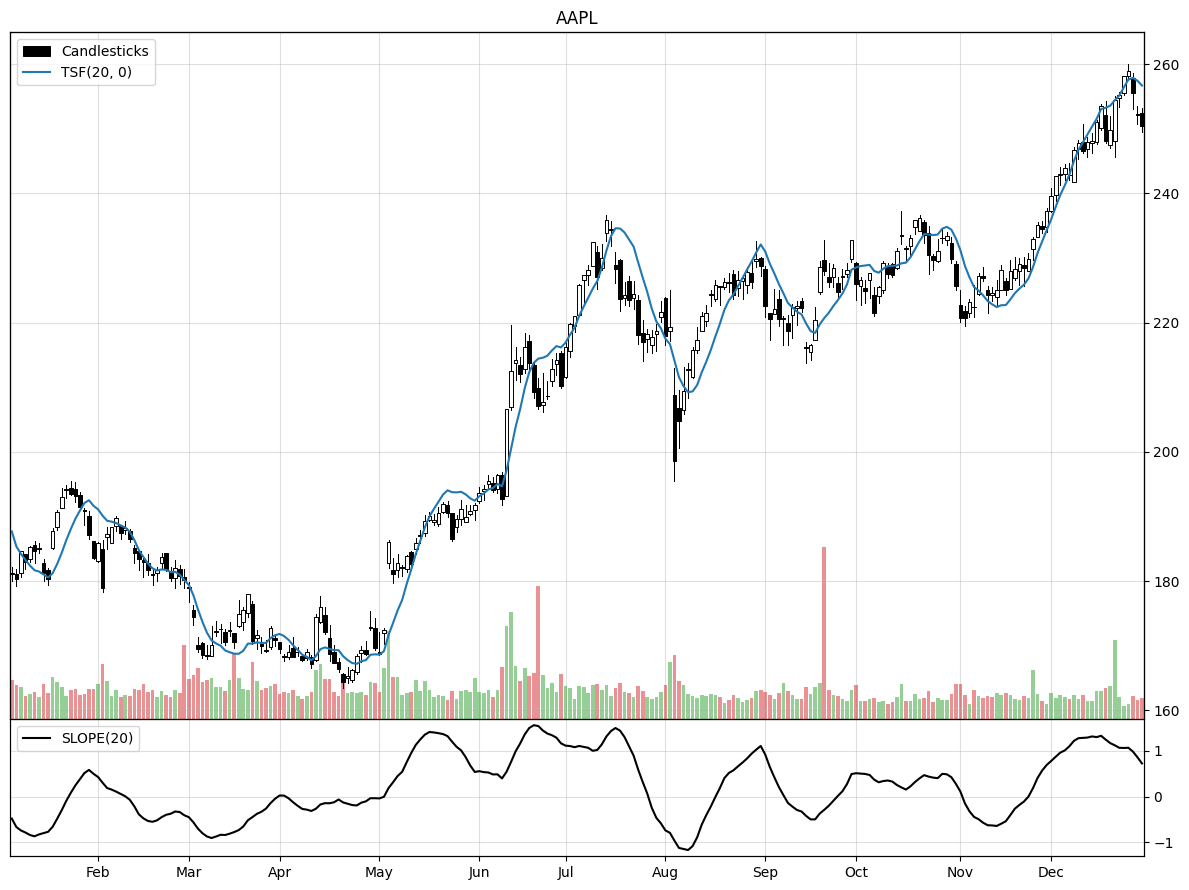

In [8]:
max_bars = 250

indicators = [
    Candlesticks(),
    TSF(20),
    Volume(),
    SLOPE(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)